In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn

Loading the data set

In [ ]:
X,y=load_breast_cancer(return_X_y=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
pred_y=clf.predict(X_test)
old_accuracy=accuracy_score(y_test,pred_y)

# Hyperparameter Tuning
---

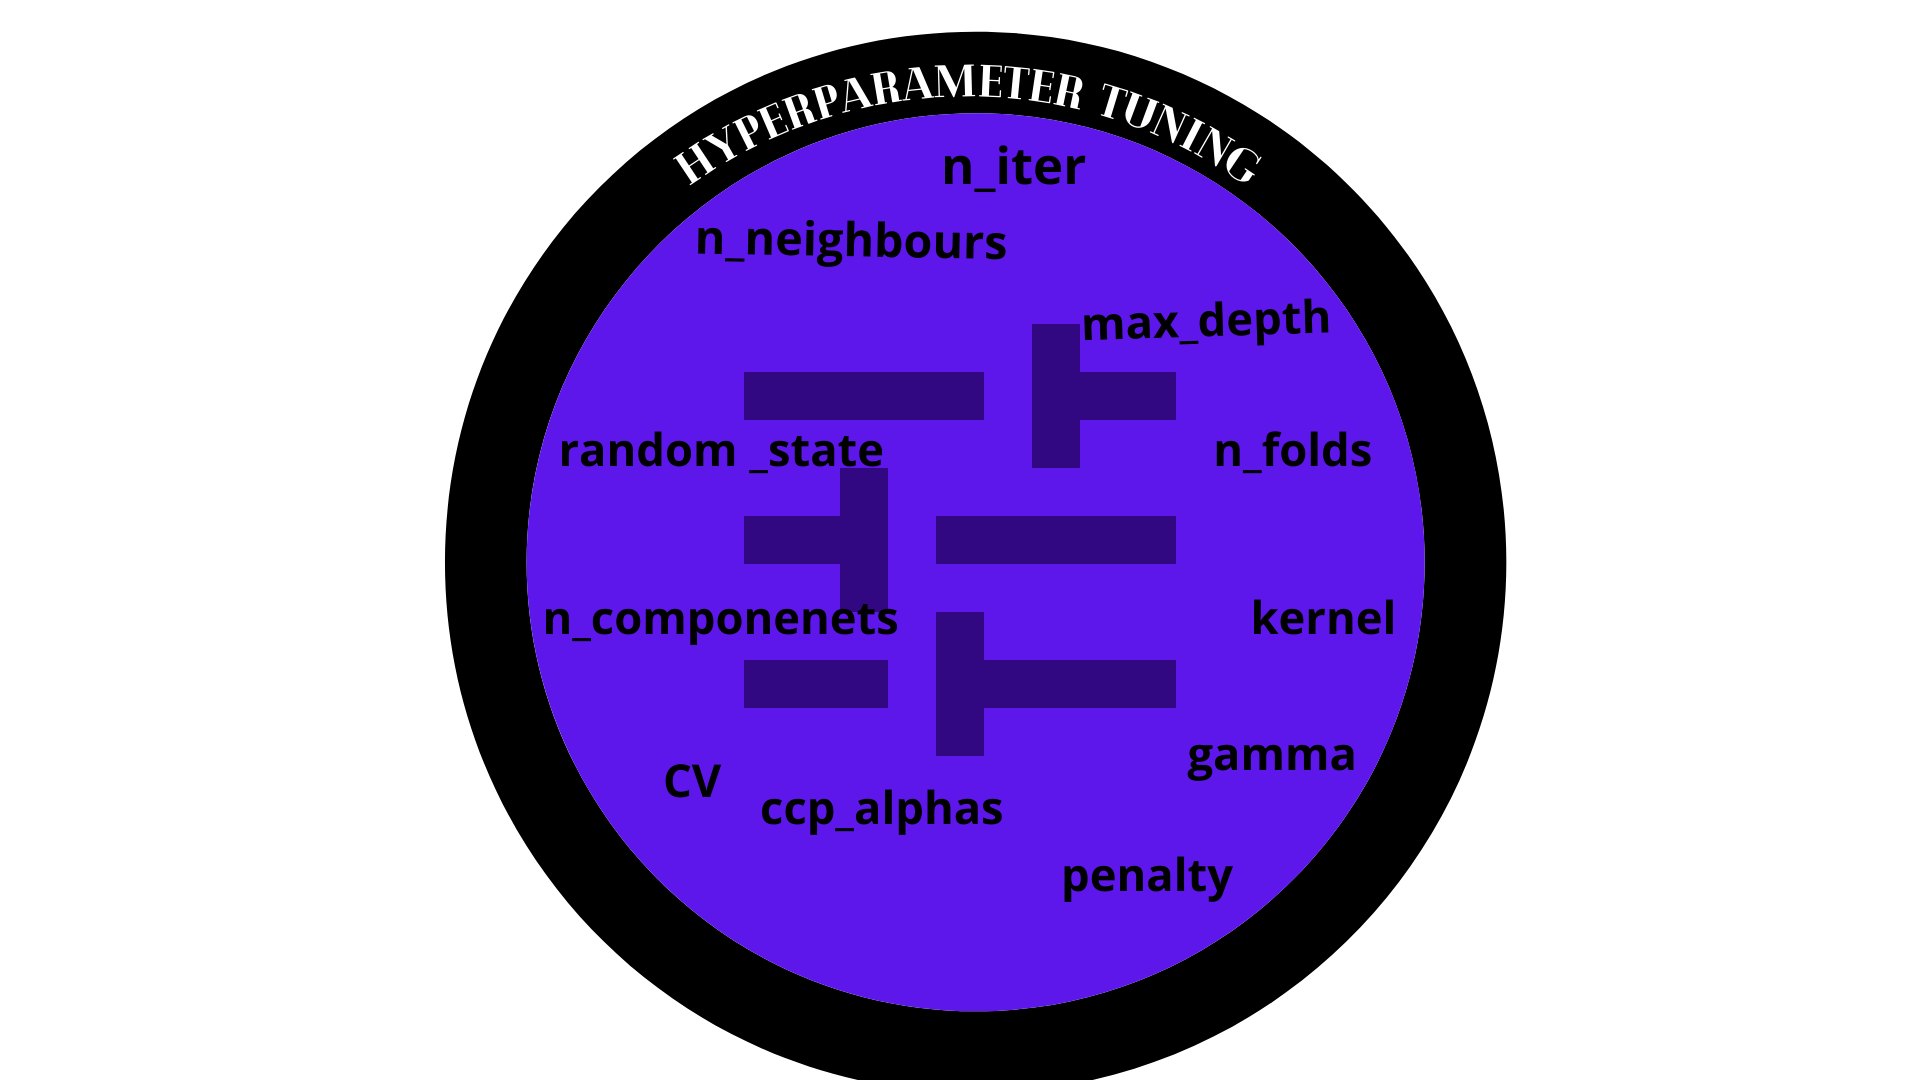

Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning. In simple words it is the process of finding right set of values for the parameters for a machine learning class or a function 


Hyperparameter types:
1. K in K-NN
2. Regularization constant, kernel type, and constants in SVMs
3. Number of layers, number of units per layer, regularization in neural network.

<u> Hyperparameters</u>: Vanilla linear regression does not have any hyperparameters. Variants of linear regression (ridge and lasso) have regularization as a hyperparameter. The decision tree has max depth and min number of observations in leaf as hyperparameters.

<u>Optimal Hyperparameters</u>: Hyperparameters control the over-fitting and under-fitting of the model. Optimal hyperparameters often differ for different datasets. To get the best hyperparameters the following steps are followed:

1. For each proposed hyperparameter setting the model is evaluated

2. The hyperparameters that give the best model are selected.

<u>Hyperparameters Search</u>: Grid search picks out a grid of hyperparameter values and evaluates all of them. Guesswork is necessary to specify the min and max values for each hyperparameter. Random search randomly values a random sample of points on the grid. It is more efficient than grid search. Smart hyperparameter tuning picks a few hyperparameter settings, evaluates the validation matrices, adjusts the hyperparameters, and re-evaluates the validation matrices. Examples of smart hyper-parameter are Spearmint (hyperparameter optimization using Gaussian processes) and Hyperopt (hyperparameter optimization using Tree-based estimators).



## GRIDSEARCH CV

<U>HYPER-PARAMETERS FOR DECISION TREE</U>


Lets’ take an example of Decision tree. When we build a DT model we don’t have any idea about which criterion (“gini” or “entropy”) ,what min_depth or min_samples_split etc will give better model so to break this kind of ambiguity we use hyperparameter tuning in which we take a range of value for each parameters and whichever parameteric value will be best we will feed that particular value into DecisionTreeClassifier() .





Create a grid_parameter dictionary having the parameters same as that of a decision tree classifier, with all the possible values for the parameters to find the  best one for our model.

In [ ]:
grid_parameters={"criterion":["gini","entropy"],
                 "splitter" : ["best", "random"],
                 "max_depth":range(2,50,1),
                 "min_samples_leaf":range(1,15,1),
                 "min_samples_split":range(2,20,1) 
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_parameters,cv=5,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 50),
                  

In [ ]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 9, 'splitter': 'random'}


In [ ]:
new_clf= DecisionTreeClassifier ( random_state=0,criterion= 'entropy',
                       max_depth= 8, 
                       min_samples_leaf= 2, 
                       min_samples_split= 9, 
                       splitter= 'random')


In [ ]:
new_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')

In [ ]:
y_pred=new_clf.predict(X_test)

In [ ]:
accuracy_gridsearchcv=accuracy_score(y_test,y_pred)

In [ ]:
print("Accuracy without hyperparameter tuning = ",old_accuracy*100,"%",
      "\n",
      "Accuracy with hyperparameter tunning(GridSearchCV) = ", accuracy_gridsearchcv*100,"%",
      "\n",
      "Increase in accuracy = ",(accuracy_gridsearchcv-old_accuracy)*100,"%")

Accuracy without hyperparameter tuning =  88.11188811188812 % 
 Accuracy with hyperparameter tunning(GridSearchCV) =  97.2027972027972 % 
 Increase in accuracy =  9.090909090909083 %
